In [1]:
data= [
    ['양말','넥타이','신발'],
    ['신발','바지','넥타이','셔츠'],
    ['모자','양말','신발'],
    ['신발','바지','넥타이','장갑']
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
t_arr = te.fit(data).transform(data)
print(type(t_arr))

<class 'numpy.ndarray'>


In [3]:
df = pd.DataFrame(t_arr, columns = te.columns_)
df

,넥타이,모자,바지,셔츠,신발,양말,장갑
0,True,False,False,False,True,True,False
1,True,False,True,True,True,False,False
2,False,True,False,False,True,True,False
3,True,False,True,False,True,False,True


In [4]:
from mlxtend.frequent_patterns import apriori
frequent = apriori(df, min_support=0.5, use_colnames=True)
frequent
#바지를 살 확률 0.5
#넥타이, 바지를 같이 살 확률 0.5

,support,itemsets
0,0.75,(넥타이)
1,0.50,(바지)
2,1.00,(신발)
3,0.50,(양말)
4,0.50,"(바지, 넥타이)"
5,0.75,"(신발, 넥타이)"
6,0.50,"(바지, 신발)"
7,0.50,"(신발, 양말)"
8,0.50,"(바지, 신발, 넥타이)"


In [5]:
#신뢰도 0.2 기준
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent, metric='confidence', min_threshold=0.2)
rules
#{바지} => {넥타이} lift가 1보다 크므로 바지를 구매한 고객이 넥타이를 구매할 확률이 높다(양의 상관관계)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(바지),(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
1,(넥타이),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
2,(신발),(넥타이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
3,(넥타이),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
4,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
7,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
8,"(바지, 신발)",(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
9,"(바지, 넥타이)",(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0


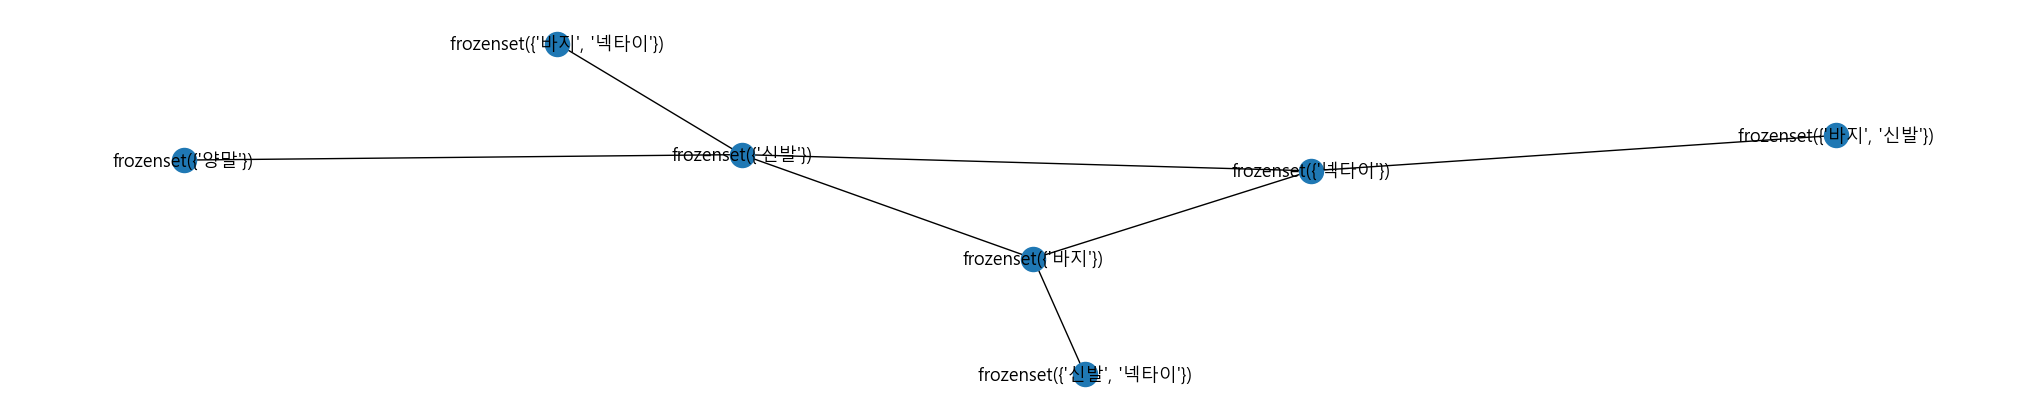

In [6]:
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt
# antecedents 선행(~라면), consequents 결과(~이다)
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=13)